In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kristiansand-map-latest/kristiansand.jpg


In [26]:
import pandas as pd
import numpy as np

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import great_circle

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import json # library to handle JSON files

import requests # library to handle requests


from bs4 import BeautifulSoup

import re

from time import sleep

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


# 1. Introduction to  the Project

<font color="blue">
Neighborhood of choice for Gusine Catering’s first venture in Kristiansand.

1.1: INTRODUCTION

• Kristiansand city overview for Gusine Catering;

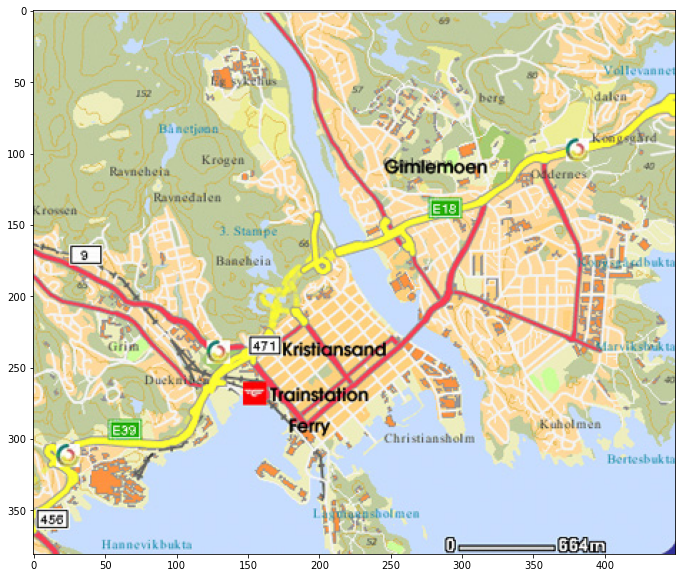

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/kristiansand-map-latest/kristiansand.jpg"))

<font color="blue">
    
• Gusine Catering Strategic Plan and Overview:

• Gusine Catering Business Problem

• Choice of the first neighborhood to offer services.

• The neighborhood should enable easy replication.

• The neighborhood should have high demand.

• The neighborhood should have lower competition.

• Success Criteria:

• Good recommendation of neighborhood that meets above points.

• It should have capability to enable latest information whenever required.

1.2. DATA DESCRIPTION


<font color="blue">
    
 For this project we need the following data :

Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    
Description : This data set contains the required information. And we will use this data set to explore various locality of Kristiansand city.
    
Nearby places in each locality of the city.
    
Data source : Fousquare API
    
Description : By using this api we will get all the venues in each neighborhood.
    
• Data Requirements for this project:
    
• Neighborhood Information (i.e. name, coordinates, populations).
    
• Venue information (i.e. name, category, coordinates)
    
• Data Processing for this project:
    
• Data cleaning is required
    
• Data needs to be in a structured format

1.3.METHODOLOGY

<font color="blue">
    
• Data Scrapping Technique
    
• To scrap the neighborhood data from Wikipedia
    
• To make the data into a structured format
    
• Foursquare.com
    
• Retrieving venue information from above API.
    
• K-Means Machine Learning
    
• Segment and cluster similar neighborhoods
    
• Group them based on most common venues
    
• Scoring Weightage
    
• Population count has 50% weightage
    
• Venue (fewer grocery) has another 50% weightage

In [28]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print("*********   Loaded library     ***********")

*********   Loaded library     ***********


<font color="blue">
1. First we need to learn the coordinates of Kristiansand city

In [29]:
address = "Kristiansand, Norway"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude
longitude =location.longitude   

kristiansand='Kristiansand location : {},{}'.format(latitude,longitude)
print(kristiansand)

Kristiansand location : 58.14615,7.9957333


<font color="blue">
2. Defining Foursquare Credentials and Version
    
To obtain access token follow these steps.


Go to your "App Settings" page on the developer console of Foursquare.com
Set the "Redirect URL" under "Web Addresses" to https://www.google.com
Paste and enter the following url in your web browser (replace YOUR_CLIENT_ID with your actual client id):
https://foursquare.com/oauth2/authenticate?client_id=YOUR_CLIENT_ID&response_type=code&redirect_uri=https://www.google.com

This should redirect you to a google page requesting permission to make the connection.

Accept and then look at the url of your web browser (take note at the CODE part of the url to use in step 5)
It should look like https://www.google.com/?code=CODE
Copy the code value from the previous step.
Paste and enter the following into your web browser (replace placeholders with actual values):
https://foursquare.com/oauth2/access_token?client_id=YOUR_CLIENT_ID&client_secret=YOUR_CLIENT_SECRET&grant_type=authorization_code&redirect_uri=https://www.google.com&code=CODE.
When you paste the link , This should lead you to a page that gives you your access token.

In [30]:
CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET =  # your Foursquare Secret
ACCESS_TOKEN =  # your FourSquare Access Token
VERSION = '20201231'
LIMIT = 150

<font color="blue">
3. Search for Restaurants within 10 KM

In [31]:
#Quering for restaurants  in Kristiansand

search_query = 'restaurant'

radius = 10000
url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#url

In [32]:
#we will get the data as json file as follows:
restaurants = requests.get(url_restaurant).json()
restaurants


{'meta': {'code': 200, 'requestId': '6000b845e93b3e0bd59919fa'},
 'response': {'venues': [{'id': '504bd168e4b095865818c938',
    'name': 'Bakgården Bar & Restaurant',
    'location': {'address': 'Tollbodgata 5',
     'lat': 58.14435570838932,
     'lng': 7.993431541856132,
     'labeledLatLngs': [{'label': 'display',
       'lat': 58.14435570838932,
       'lng': 7.993431541856132}],
     'distance': 241,
     'postalCode': '4611',
     'cc': 'NO',
     'city': 'Kristiansand',
     'state': 'Vest-Agder',
     'country': 'Norge',
     'formattedAddress': ['Tollbodgata 5', '4611 Kristiansand', 'Norge']},
    'categories': [{'id': '4bf58dd8d48988d116941735',
      'name': 'Bar',
      'pluralName': 'Bars',
      'shortName': 'Bar',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '120301970'},
    'referralId': 'v-1610659909',
    'hasPerk': False},
   {'id': '4deba9fed164ef597d0aaa

In [33]:
#Here we will transform json file into a pandas dataframe as follows:

# assign relevant part of JSON to venues
venues_restaurant = restaurants['response']['venues']

# tranforming venues into a dataframe and merging both data

df= pd.json_normalize(venues_restaurant)



print("There are {} restaurants and hotels at Kristiansand".format(df.shape[0]))

There are 8 restaurants and hotels at Kristiansand


In [34]:
df.head()
#Here is the list of restaurants in Kristiansand

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,504bd168e4b095865818c938,Bakgården Bar & Restaurant,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",v-1610659909,False,Tollbodgata 5,58.144356,7.993432,"[{'label': 'display', 'lat': 58.14435570838932...",241,4611,NO,Kristiansand,Vest-Agder,Norge,"[Tollbodgata 5, 4611 Kristiansand, Norge]",120301970
1,4deba9fed164ef597d0aaacd,Restaurant Østen,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1610659909,False,NaN,58.146499,7.991297,"[{'label': 'display', 'lat': 58.1464992373656,...",263,NaN,NO,Kristiansand,Vest-Agder,Norge,"[Kristiansand, Norge]",NaN
2,5856b985de0cbc434ae9b376,Restaurant Q42,"[{'id': '52e81612bcbc57f1066b79f4', 'name': 'B...",v-1610659909,False,NaN,58.148886,8.003232,"[{'label': 'display', 'lat': 58.148886, 'lng':...",535,NaN,NO,NaN,NaN,Norge,[Norge],NaN
3,4c12c321a9c220a1b69b549d,Harvey's Bar & Restaurant,"[{'id': '4bf58dd8d48988d11d941735', 'name': 'S...",v-1610659909,False,Tollbodgata 3,58.144091,7.993516,"[{'label': 'display', 'lat': 58.14409071447443...",263,4611,NO,Kristiansand,Vest-Agder,Norge,"[Tollbodgata 3, 4611 Kristiansand, Norge]",122298052
4,558eeaaf498e0b6633f57e45,Brasserie Restaurant at Radisson Blu Caledonie...,[],v-1610659909,False,NaN,58.142761,7.994034,"[{'label': 'display', 'lat': 58.142761, 'lng':...",390,NaN,NO,NaN,NaN,Norge,[Norge],NaN


In [35]:
#Here we will define information of interest and filter dataframe

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
dataframe_filtered = df.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
df_filtered=dataframe_filtered[['name','categories','distance','lat','lng','id']]
df_filtered.head()

,name,categories,distance,lat,lng,id
0,Bakgården Bar & Restaurant,Bar,241,58.144356,7.993432,504bd168e4b095865818c938
1,Restaurant Østen,Chinese Restaurant,263,58.146499,7.991297,4deba9fed164ef597d0aaacd
2,Restaurant Q42,Buffet,535,58.148886,8.003232,5856b985de0cbc434ae9b376
3,Harvey's Bar & Restaurant,Sports Bar,263,58.144091,7.993516,4c12c321a9c220a1b69b549d
4,Brasserie Restaurant at Radisson Blu Caledonie...,None,390,58.142761,7.994034,558eeaaf498e0b6633f57e45


The visualization of Restaurants in the Map:

In [36]:
kristiansand_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around the Kristiansand

# add a red circle marker to represent the core location of Kristiansand
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Kristiansand Center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(kristiansand_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(kristiansand_map)

# display map
kristiansand_map

# 2. Exploratory Data Analysis

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.axis.XTick at 0x7f3aebdcd950>,
 <a list of 8 Text major ticklabel objects>)

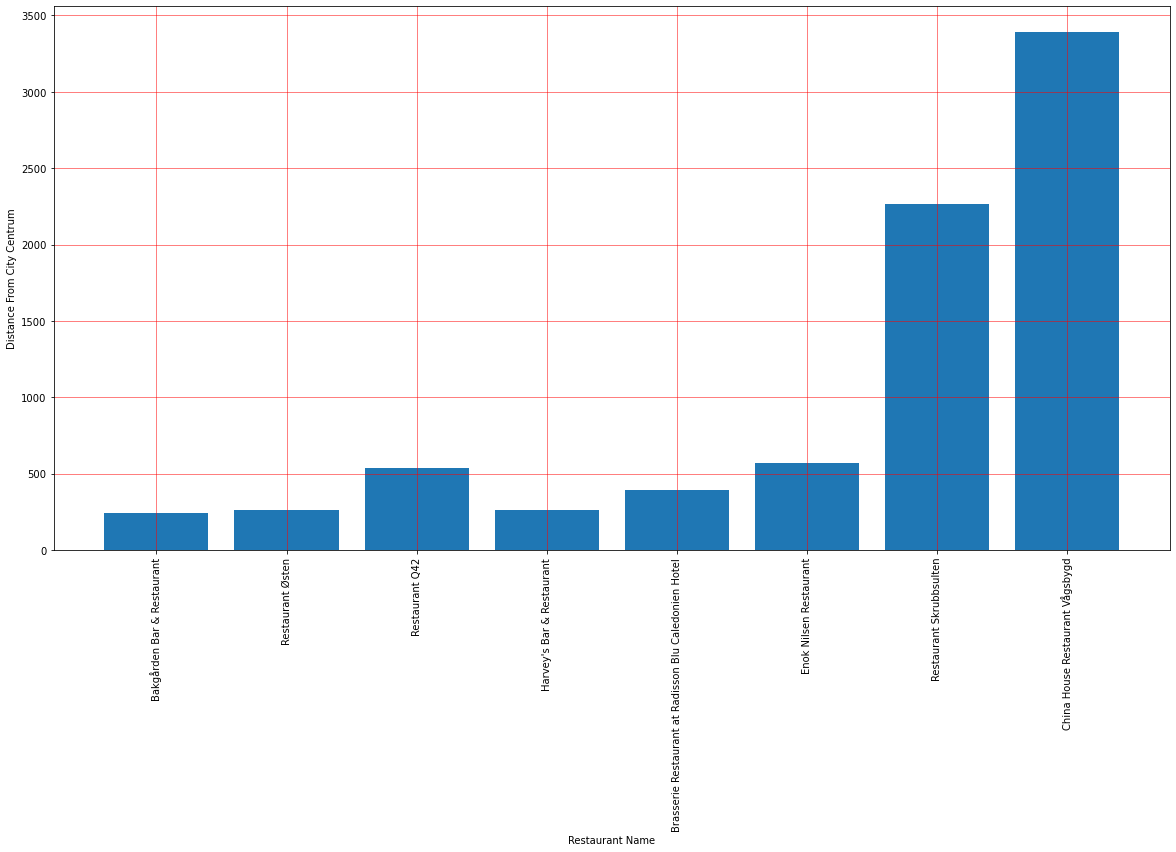

In [44]:
plt.figure(figsize=(20,10))
plt.grid(True, linewidth=0.5, color='#ff0000', linestyle='-')
plt.xlabel("Restaurant Name")
plt.ylabel("Distance From City Centrum")
plt.bar(df_filtered["name"], df_filtered["distance"])
plt.xticks(df_filtered.name,rotation=90)

# 3. Exploring Other Venues Around Kristiansand

<font color="blue">
A tourist person always wants to visit nearby iconic places.So he wants to reside somewhere nearby to all major venues.We will be exploring more venues around the core location.We will be digging more on main areas or place around 1 km because the average distance of restaurants from the center is around 500 meters.

In [55]:
radius=10000
url_venues = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)


In [75]:
venues = requests.get(url_venues).json()
df_venues=pd.json_normalize(venues["response"]["groups"][0]["items"])
df_venues.head()


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.crossStreet
0,e-0-4b51cb99f964a520d65527e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b51cb99f964a520d65527e3,Mother India,Markensgate 6,58.144091,7.996014,"[{'label': 'display', 'lat': 58.14409102670541...",229,4610,NO,Kristiansand,Vest-Agder,Norge,"[Markensgate 6, 4610 Kristiansand, Norge]","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN
1,e-0-4c07de093f200f47452f09d1-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c07de093f200f47452f09d1,Håndverkeren,Rådhusgata 15,58.146944,7.996687,"[{'label': 'display', 'lat': 58.14694368653257...",104,4611,NO,Kristiansand,Vest-Agder,Norge,"[Rådhusgata 15, 4611 Kristiansand, Norge]","[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[],NaN,NaN
2,e-0-4c9df055d3c2b60cb6d5c5bc-2,0,"[{'summary': 'This spot is popular', 'type': '...",4c9df055d3c2b60cb6d5c5bc,Cuba Life,Tollbodgata 6,58.144582,7.994494,"[{'label': 'display', 'lat': 58.14458189457202...",189,4611,NO,Kristiansand,Vest-Agder,Norge,"[Tollbodgata 6, 4611 Kristiansand, Norge]","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],53392142,NaN
3,e-0-4b5443e2f964a520feb527e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b5443e2f964a520feb527e3,Camillo Bastrup,Markens gate 53,58.147593,7.989075,"[{'label': 'display', 'lat': 58.14759339855729...",422,4612,NO,Kristiansand,Vest-Agder,Norge,"[Markens gate 53, 4612 Kristiansand, Norge]","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN
4,e-0-51ad3056498e193580ad0add-4,0,"[{'summary': 'This spot is popular', 'type': '...",51ad3056498e193580ad0add,Scandic Kristiansand Bystranda,Østre Strandgate 74,58.146983,8.005120,"[{'label': 'display', 'lat': 58.14698322955937...",559,NaN,NO,Kristiansand,Vest-Agder,Norge,"[Østre Strandgate 74, Kristiansand, Norge]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,NaN


In [78]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in df_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = df_venues.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered_venues['venue.categories'] = dataframe_filtered_venues.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]

dataframe_filtered_venues.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Mother India,Indian Restaurant,Markensgate 6,58.144091,7.996014,"[{'label': 'display', 'lat': 58.14409102670541...",229,4610,NO,Kristiansand,Vest-Agder,Norge,"[Markensgate 6, 4610 Kristiansand, Norge]",NaN,4b51cb99f964a520d65527e3
1,Håndverkeren,Pub,Rådhusgata 15,58.146944,7.996687,"[{'label': 'display', 'lat': 58.14694368653257...",104,4611,NO,Kristiansand,Vest-Agder,Norge,"[Rådhusgata 15, 4611 Kristiansand, Norge]",NaN,4c07de093f200f47452f09d1
2,Cuba Life,Coffee Shop,Tollbodgata 6,58.144582,7.994494,"[{'label': 'display', 'lat': 58.14458189457202...",189,4611,NO,Kristiansand,Vest-Agder,Norge,"[Tollbodgata 6, 4611 Kristiansand, Norge]",NaN,4c9df055d3c2b60cb6d5c5bc
3,Camillo Bastrup,Coffee Shop,Markens gate 53,58.147593,7.989075,"[{'label': 'display', 'lat': 58.14759339855729...",422,4612,NO,Kristiansand,Vest-Agder,Norge,"[Markens gate 53, 4612 Kristiansand, Norge]",NaN,4b5443e2f964a520feb527e3
4,Scandic Kristiansand Bystranda,Hotel,Østre Strandgate 74,58.146983,8.005120,"[{'label': 'display', 'lat': 58.14698322955937...",559,NaN,NO,Kristiansand,Vest-Agder,Norge,"[Østre Strandgate 74, Kristiansand, Norge]",NaN,51ad3056498e193580ad0add


In [81]:
#Extract Venues using Search Queries
search_query_list = ['temple','church','park','museum'] 
radius =1000
temp_df=[]
search_df=[]

def search_query_fn():   
    #Loop to run through urls and from json to pandas
    for i in range(len(search_query_list)):
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_list[i], radius, LIMIT)
        
        results=requests.get(url).json()
        venues = results['response']['venues']
        
        #Normalize from json
        dataframe = json_normalize(venues)
        
        #Removing unwanted column headers
        dataframe.columns = [col.split('.')[-1] for col in dataframe.columns]
        temp_df.append(dataframe)
    
    #Loop to append dataframes to single dataframe
    for j in range(len(search_query_list)):
        data=temp_df[j]
        search_df.append(data)
# Function to run loop over queries
search_query_fn()

search_df = pd.concat(search_df,sort=True)
search_df['categories'] = search_df.apply(get_category_type, axis=1)
search_df = pd.DataFrame(search_df[['name','categories','distance','lat','lng','id']])
search_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,distance,lat,lng,id
0,Church Kristiansand,Church,40,58.146370,7.995179,5cd42f6631ac6c003905c0b8
0,thon hotel parken,Hotel,15,58.146036,7.995592,5b10d3301f8ed6002caa452b
1,Q Park,Parking,325,58.146162,7.990196,5ae856ba8c35dc00390bf7b8
2,Kjøita Park Legesenter,Doctor's Office,843,58.153027,8.001756,4f4c89a9e4b04c96f98fa580
3,Bogbil Park,Campground,870,58.139053,8.001949,5b06b886b1538e002c5b39c3
4,Torvet parkering,Parking,112,58.145234,7.994935,5a06c233c9f90742bad87af9
5,Parko,Parking,361,58.143106,7.993612,4cac0b32f47ea143c51f8e21
6,Gyldengården Parkeringshus,Parking,145,58.147452,7.995853,51836d26498e0f165edc57bf
7,Esso Parko,Gas Station,329,58.143319,7.994087,4eda493e93ad464d28590250
8,Slottet Parkering,Parking,421,58.147752,7.989239,518e0d50498e789798c21c4b


In [84]:

# Data extracted from foursquare venues
four_sq_venue=pd.DataFrame(dataframe_filtered_venues[['name','categories','distance','lat','lng','id']])

# Data extracted from search queries
new_venues=pd.DataFrame(search_df)

# Concatenate both dataframe
df_venues=pd.concat([four_sq_venue, new_venues],sort=True)
df_venues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 1
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categories  89 non-null     object 
 1   distance    89 non-null     int64  
 2   id          89 non-null     object 
 3   lat         89 non-null     float64
 4   lng         89 non-null     float64
 5   name        89 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.9+ KB


In [88]:
# here we visualize our data with new venues
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) 

# add a red circle marker to represent the Kristiansand
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Kristiansand',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(df_venues.lat, df_venues.lng, df_venues.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        #popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

([<matplotlib.axis.XTick at 0x7f3aeb85f750>,
 <a list of 8 Text major ticklabel objects>)

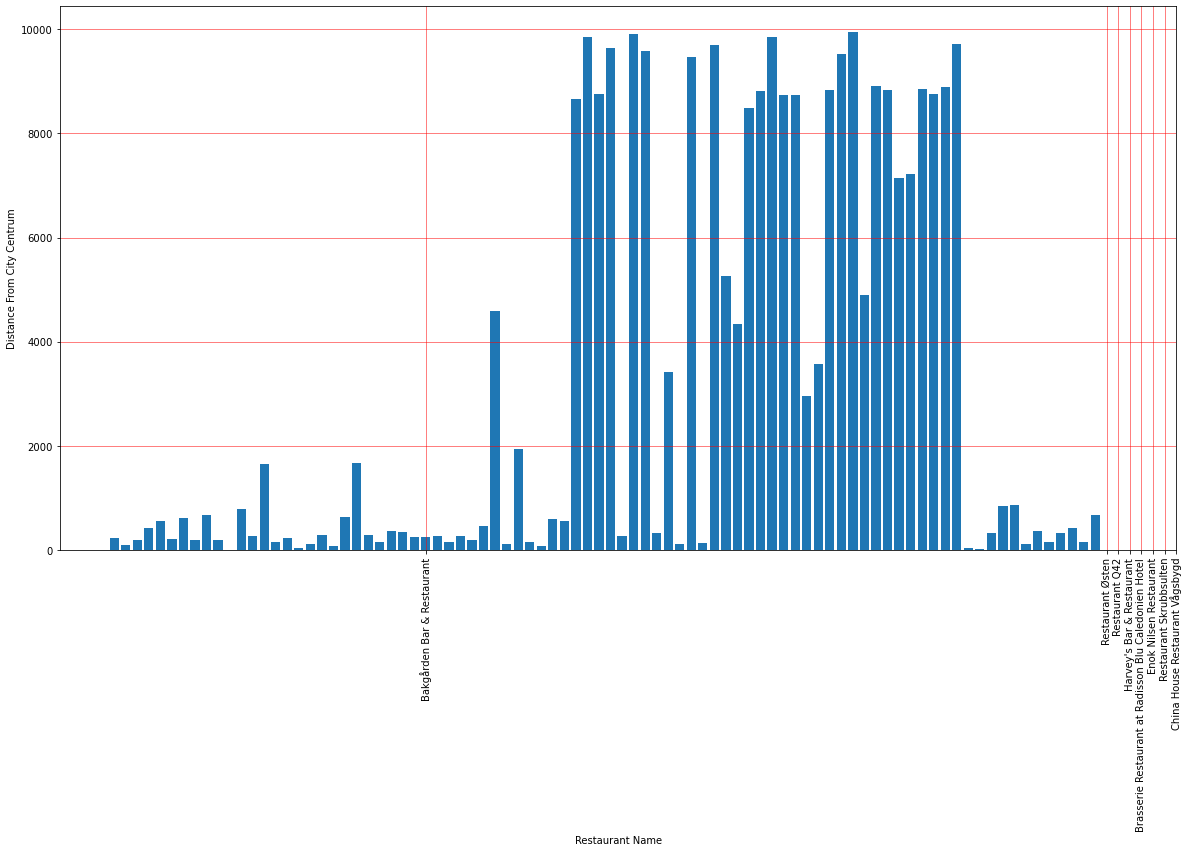

In [87]:
# we create a plot with new venues
plt.figure(figsize=(20,10))
plt.grid(True, linewidth=0.5, color='#ff0000', linestyle='-')
plt.xlabel("Restaurant Name")
plt.ylabel("Distance From City Centrum")
plt.bar(df_venues["name"], df_venues["distance"])
plt.xticks(df_filtered.name,rotation=90)

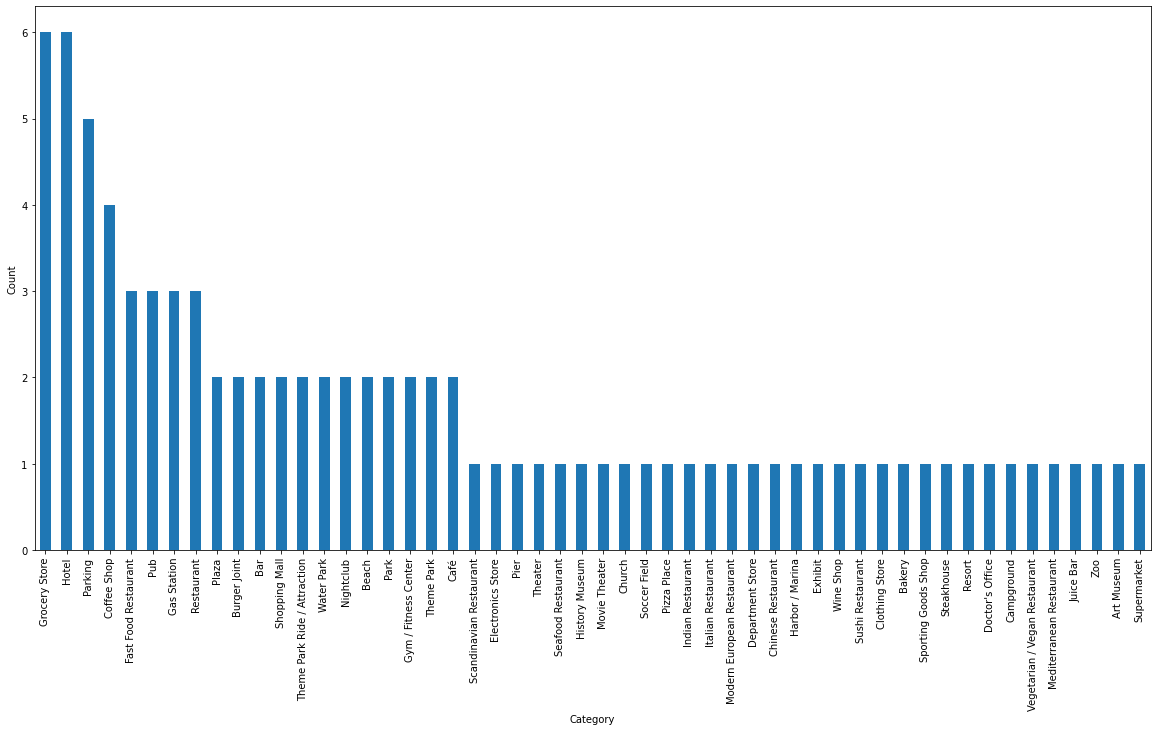

In [94]:
# we create a plot of venues according to their category 
plt.figure(figsize=(20,10))
plt.grid(True, linewidth=0.5, color='#ff0000', linestyle='-')
plt.xlabel("Category")
plt.ylabel("Count")
df_venues['categories'].value_counts().plot(kind="bar")



# 4. Clustering based on Venues

In [116]:
df_venues.head()

,categories,distance,id,lat,lng,name
0,Indian Restaurant,229,4b51cb99f964a520d65527e3,58.144091,7.996014,Mother India
1,Pub,104,4c07de093f200f47452f09d1,58.146944,7.996687,Håndverkeren
2,Coffee Shop,189,4c9df055d3c2b60cb6d5c5bc,58.144582,7.994494,Cuba Life
3,Coffee Shop,422,4b5443e2f964a520feb527e3,58.147593,7.989075,Camillo Bastrup
4,Hotel,559,51ad3056498e193580ad0add,58.146983,8.005120,Scandic Kristiansand Bystranda


In [117]:
# we do not need id column, it is not meaningful for the algorithm
df_venues.drop("id",axis=1,inplace=True)
df_venues.head()

,categories,distance,lat,lng,name
0,Indian Restaurant,229,58.144091,7.996014,Mother India
1,Pub,104,58.146944,7.996687,Håndverkeren
2,Coffee Shop,189,58.144582,7.994494,Cuba Life
3,Coffee Shop,422,58.147593,7.989075,Camillo Bastrup
4,Hotel,559,58.146983,8.005120,Scandic Kristiansand Bystranda


In [118]:
#There is no any missing data
df_venues.isnull().sum()

categories    0
distance      0
lat           0
lng           0
name          0
dtype: int64

In [120]:
# Clustering

# set number of clusters
kclusters = 3

venue_clustering = df_venues.drop(["name","categories"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0)
kmeans.fit(venue_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [122]:
# add clustering labels
df_venues.insert(0, 'Clusters', kmeans.labels_)

df_venues

,Clusters,Clustersss,categories,distance,lat,lng,name
0,0,0,Indian Restaurant,229,58.144091,7.996014,Mother India
1,0,0,Pub,104,58.146944,7.996687,Håndverkeren
2,0,0,Coffee Shop,189,58.144582,7.994494,Cuba Life
3,0,0,Coffee Shop,422,58.147593,7.989075,Camillo Bastrup
4,0,0,Hotel,559,58.146983,8.005120,Scandic Kristiansand Bystranda
5,0,0,Pub,203,58.144531,7.994130,Brygghuset (Christianssand Brygghus)
6,0,0,Water Park,620,58.147091,8.006144,Aquarama Bad
7,0,0,Pub,184,58.144523,7.995175,Patricks Pub
8,0,0,Beach,665,58.146106,8.007064,Bystranda
9,0,0,Burger Joint,191,58.144429,7.995692,Burger Bordello


In [125]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='green',
    popup='Kristiansand',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_venues['lat'], df_venues['lng'], df_venues['name'], df_venues['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

#  5.Results Section

<font color="blue">

Top venues are clustered in red color as we can see in the map above.

    Discussion:
From above reports,we could get an idea why the predicted one is pointed/clustered on the red spots which is the center of attraction for the place where we can establish our restaurant.

KMeans have figured out the most common place for all the venues.This output was very adjacent to the core location.This proves the accurate spotting of our predicted algorithm.


    Conclusion:
As a result,one can set up a hotel/restaurant around given red spot.This will bring revenue automatically as we have located in very near to core one which is proved by Kmeans.

